In [1]:
#importing libraries
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from IPython.display import clear_output
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
#3
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # getting data␣↪from online
print('X shape:', X.shape, 'y shape:', y.shape)

digits = {j:[] for j in range(10)}
X_np = X.to_numpy()
for j in range(len(y)): # takes data assigns it into a dictionary
    digits[int(y[j])].append(X_np[j].reshape(28,28))
    
digits = {j:np.stack(digits[j]) for j in range(10)} # stack everything to be␣↪one numpy array
for j in range(10):
    print('Shape of data with label', j, ':', digits[j].shape )
    

C:\Users\govinda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


X shape: (70000, 784) y shape: (70000,)
Shape of data with label 0 : (6903, 28, 28)
Shape of data with label 1 : (7877, 28, 28)
Shape of data with label 2 : (6990, 28, 28)
Shape of data with label 3 : (7141, 28, 28)
Shape of data with label 4 : (6824, 28, 28)
Shape of data with label 5 : (6313, 28, 28)
Shape of data with label 6 : (6876, 28, 28)
Shape of data with label 7 : (7293, 28, 28)
Shape of data with label 8 : (6825, 28, 28)
Shape of data with label 9 : (6958, 28, 28)


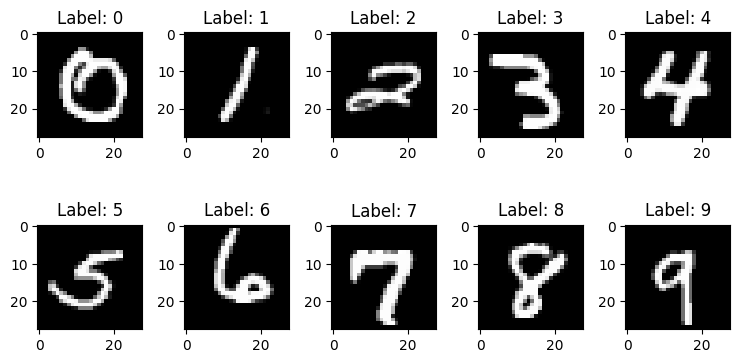

In [3]:
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    # select current digit
    curr_digit = digits[i]
    ax.imshow(curr_digit[np.random.randint(curr_digit.shape[0])], cmap='gray')
    ax.set_title('Label: {}'.format(i))
plt.tight_layout()
plt.show()   

In [4]:

def output_data(num1, num2):
    # gathers training and testing data for num1 & num2 type data
    x_train = np.concatenate([digits[num1][:500].reshape(500,28*28),digits[num2][:500].reshape(500,28*28)])
    y_train = np.concatenate([np.ones(500), -1*np.ones(500)]).reshape(1000,1)
    x_test = np.concatenate([digits[num1][500:1000].reshape(500,28*28),digits[num2][500:1000].reshape(500,28*28)])
    max_val = np.max(x_train)
    y_test = y_train
    return x_train/max_val, y_train, x_test/max_val, y_test

X_train, y_train, X_test, y_test = output_data(4, 9)


In [17]:
w = np.random.normal(size=(784,1))
w = np.zeros((784,1))
w = np.ones((784, 1))

def grad_F(w, x_train, y_train):
    exp_val = np.exp(-y_train*(x_train @ w))
    grad = (-exp_val/(1+exp_val))*y_train*x_train
    return grad.transpose().mean(axis=1).reshape((28*28,1))

def F(w, x_train, y_train):
    F = np.log(1+np.exp(-y_train*(x_train @ w))).mean()
    return F

Final training error: 0.02930821212248925


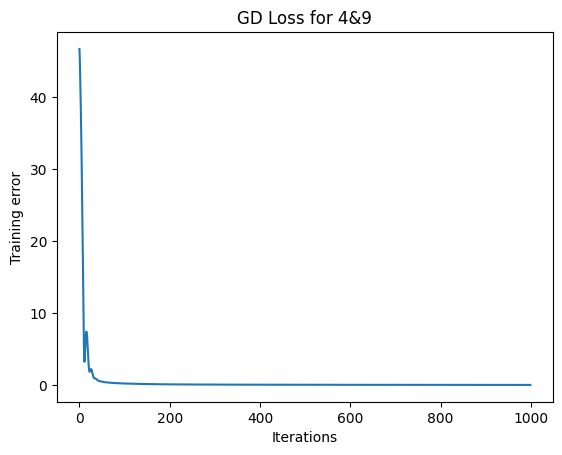

In [16]:
#3a
def gradient_descent_momentum(w, T=200, mu=1e-4, num1=0, num2=1, plot=True):
    x_train, y_train, x_test, y_test = output_data(num1, num2)
    F_history = []
    
    beta=0.84
    mu_t=0.1
    w1 = w - mu_t*grad_F(w, x_train, y_train)
    w_star=w
    
    for t in range(T):
        F_history.append(F(w1,x_train,y_train))
        w2 = w1 - mu_t*grad_F(w1, x_train, y_train)+beta*(w1-w_star)
        w_star=w1 # update x_t-1 to x_t
        w1=w2 # update x_t to x_t+1
        
        if (t%500) == 0:
            print('Finished', t, 'iterations...')
            clear_output(wait=True) 
    if plot:
        plt.plot(range(T), F_history)
        plt.xlabel('Iterations')
        plt.ylabel('Training error')
        plt.title('GD Loss for '+str(num1)+ '&'+str(num2))
    print('Final training error:', F(w1, x_train, y_train))
    return w1, F_history, x_train, y_train, x_test, y_test

T_max = 1000
w_star, F_hist, x_train, y_train, x_test, y_test = gradient_descent_momentum(w,T=T_max,mu=1e-4, num1=4, num2=9, plot=True)

Final training error: 0.02930821212248925


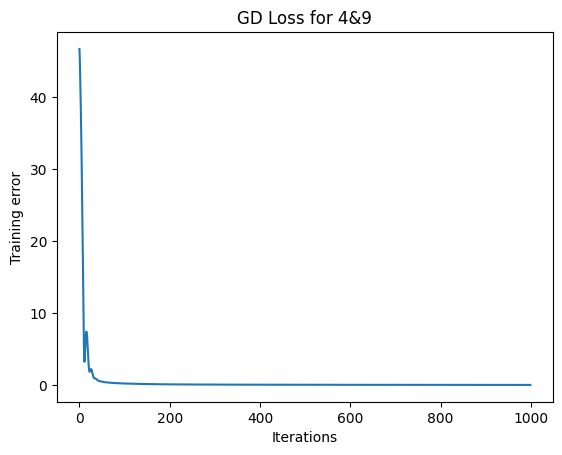

In [18]:
#3b

def gradient_descent_nestrov(w, T=200, mu=1e-4, num1=0, num2=1, plot=True):
    x_train, y_train, x_test, y_test = output_data(num1, num2)
    F_history = []
    
    beta=0.84
    mu_t=0.1
    w1 = w - mu_t*grad_F(w, x_train, y_train)
    w_star=w
    
    for t in range(T):
        F_history.append(F(w1,x_train,y_train))
        y_t = w1 + beta*(w1-w_star)
        grad = grad_F(y_t, x_train, y_train)
        
        w2 = y_t - mu_t*grad
        w_star=w1 # update x_t-1 to x_t
        w1=w2 # update x_t to x_t+1
        
        if (t%500) == 0:
            print('Finished', t, 'iterations...')
            clear_output(wait=True) 
    if plot:
        plt.plot(range(T), F_history)
        plt.xlabel('Iterations')
        plt.ylabel('Training error')
        plt.title('GD Loss for '+str(num1)+ '&'+str(num2))
    return w1, F_history, x_train, y_train, x_test, y_test

T_max = 1000
w_star, F_hist, x_train, y_train, x_test, y_test = gradient_descent_momentum(w,T=T_max,mu=1e-4, num1=4, num2=9, plot=True)